In [16]:
content = ''
with open('../dataset/oxygen.txt', encoding='utf-8') as f:
    for l in f:
        nl = l.strip().replace(' ', '')
        content += nl
# print(content)
content = content.split("AA550F0702")[1:-1]
# print(content)
hexstr = ''
for i in content:
    hexstr += i[:12]
print(hexstr)

2C29262421D01F1D1A18173A1513121111D81213182231B84457656C6CC167605AD44F8D4944403B37DE33302C29260824211F1C1A671816151312BC1010111215521C293A4E5FFF696D6A635D21D7514C4742F53E3A36322F8C2B2824221F4A1D1B191715F01412111011BA1113182231F64456646B6B08665F59D34E464944403C38F135322F2C29C92622201E1CA11A18161413FE1111121315301D293A4E5F326A6D6A635D6FD7514C4742F53E3A373331612E2B282522861F1D1B19175515141211115E1214192332B34558666C6C72676059D44E374944403C38F135312E2B28DA2623201E1C2E1918161412EE1111111316361D2A3B4E5F11696D69625BDCD54F4A4641AC3D3936322F4A2C29262320E01E1C1A1816261513111010A61113172230F74356646A6AC3655E58D24D0A47423E3A36F433302D2A27A824221F1C1AEF18161513115E1010101113711B27384B5CE9666A676059ECD44E48433FB93A3733302D162A2724211F481C1A1816148312100F0E0E730F1116202FC84154626869E5645C56D04B7846423D39356A312D2A2825D923211F1C1A3618151312109D0F0F101113C01B2637495A756468655E5888D24C47423D05393633302DD72A2623211EE31C1A181615DD1312111010B5111217212FF1415361676780625B55CF4A2C45413D3935AC322F2C2926672421

In [37]:
bs = bytes.fromhex(hexstr)
data = []
for i in bs:
    data.append(i)
data=data[:7000]
data

[44,
 41,
 38,
 36,
 33,
 208,
 31,
 29,
 26,
 24,
 23,
 58,
 21,
 19,
 18,
 17,
 17,
 216,
 18,
 19,
 24,
 34,
 49,
 184,
 68,
 87,
 101,
 108,
 108,
 193,
 103,
 96,
 90,
 212,
 79,
 141,
 73,
 68,
 64,
 59,
 55,
 222,
 51,
 48,
 44,
 41,
 38,
 8,
 36,
 33,
 31,
 28,
 26,
 103,
 24,
 22,
 21,
 19,
 18,
 188,
 16,
 16,
 17,
 18,
 21,
 82,
 28,
 41,
 58,
 78,
 95,
 255,
 105,
 109,
 106,
 99,
 93,
 33,
 215,
 81,
 76,
 71,
 66,
 245,
 62,
 58,
 54,
 50,
 47,
 140,
 43,
 40,
 36,
 34,
 31,
 74,
 29,
 27,
 25,
 23,
 21,
 240,
 20,
 18,
 17,
 16,
 17,
 186,
 17,
 19,
 24,
 34,
 49,
 246,
 68,
 86,
 100,
 107,
 107,
 8,
 102,
 95,
 89,
 211,
 78,
 70,
 73,
 68,
 64,
 60,
 56,
 241,
 53,
 50,
 47,
 44,
 41,
 201,
 38,
 34,
 32,
 30,
 28,
 161,
 26,
 24,
 22,
 20,
 19,
 254,
 17,
 17,
 18,
 19,
 21,
 48,
 29,
 41,
 58,
 78,
 95,
 50,
 106,
 109,
 106,
 99,
 93,
 111,
 215,
 81,
 76,
 71,
 66,
 245,
 62,
 58,
 55,
 51,
 49,
 97,
 46,
 43,
 40,
 37,
 34,
 134,
 31,
 29,
 27,
 25,
 23,
 85,
 21

In [40]:
import numpy as np

arr = np.array(data).reshape(-1,1000)
arr

array([[ 44,  41,  38, ...,  27,  26,  24],
       [ 22, 160,  20, ...,  58,  18,  20],
       [ 25,  35,  50, ..., 106, 104,  94],
       ...,
       [ 56, 226,  53, ...,  86,  35,  33],
       [ 31,  29,  27, ...,  18,  17, 214],
       [ 17,  17,  18, ...,  56,  75,  92]])

In [43]:
import pandas as pd

df = pd.DataFrame(arr)
df = df.T
df

,0,1,2,3,4,5,6
0,44,22,25,98,56,31,17
1,41,160,35,92,226,29,17
2,38,20,50,214,53,27,18
3,36,19,179,80,51,172,19
4,33,17,68,75,48,24,26
...,...,...,...,...,...,...,...
995,177,17,91,235,40,21,37
996,30,18,102,70,38,20,39
997,27,58,106,66,86,18,56
998,26,18,104,62,35,17,75


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

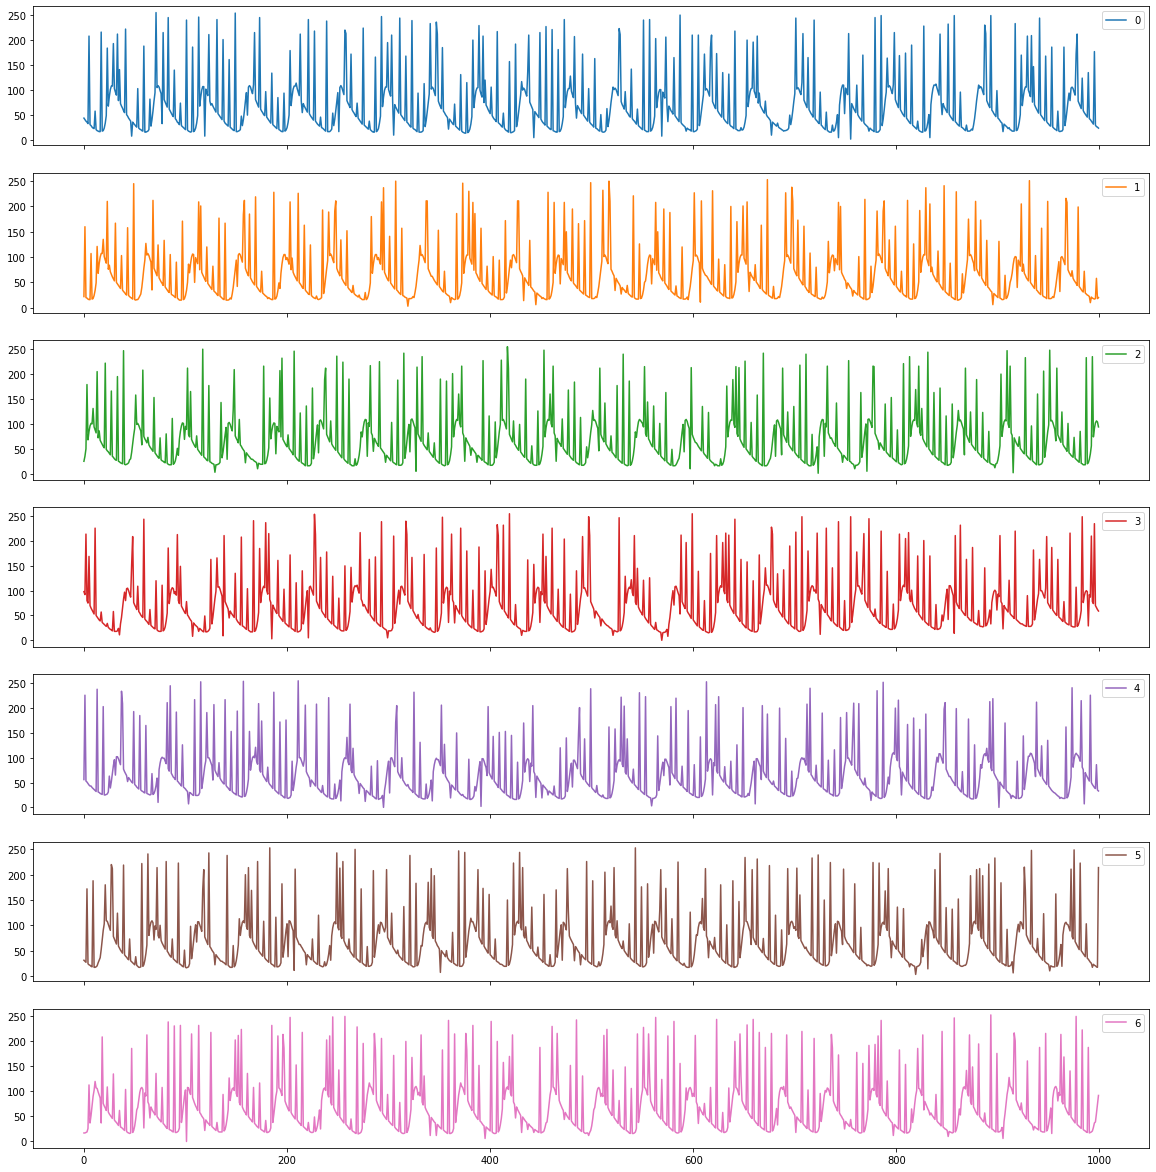

In [44]:
df.plot(subplots=True, figsize=(20, 21))

In [48]:
df[0]

0       44
1       41
2       38
3       36
4       33
      ... 
995    177
996     30
997     27
998     26
999     24
Name: 0, Length: 1000, dtype: int32

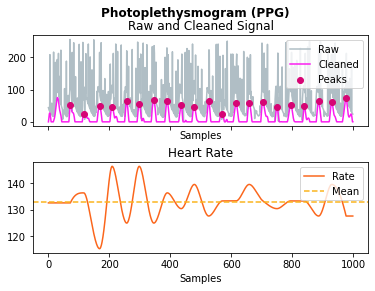

In [51]:
import neurokit2 as nk

ppg = df[0]
signals, info = nk.ppg_process(ppg, sampling_rate=100)
fig = nk.ppg_plot(signals)